In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the dataset

In [4]:
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data Science Class resources/DSData-master/SBI_Life_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [8]:
df.shape

(1338, 8)

In [9]:
#Checking the null values(if any)

In [10]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

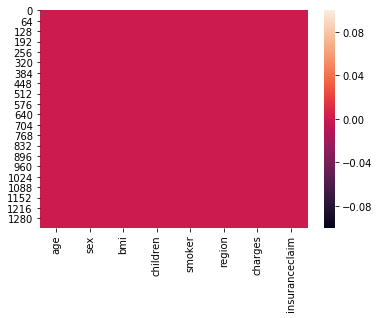

In [11]:
sns.heatmap(df.isnull())
plt.show()

# Statistical Summary of the Data

In [12]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [13]:
#checking the correlation
dfcor=df.corr()

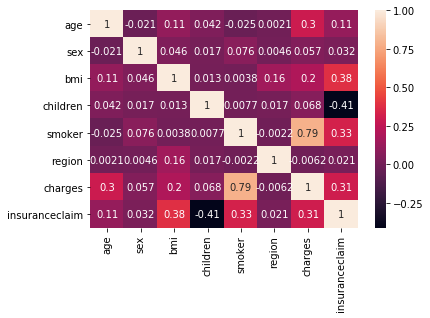

In [14]:
sns.heatmap(dfcor,annot=True)
plt.show()

# Univariate Analysis

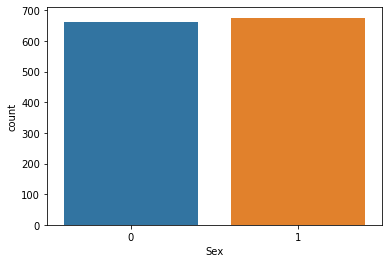

In [15]:
sns.countplot(x='sex',data=df)
plt.xlabel('Sex')
plt.show()

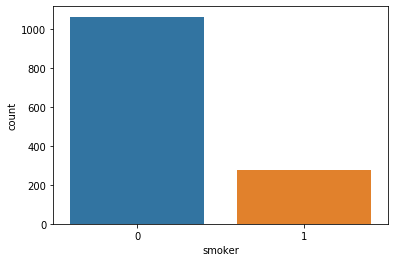

In [16]:
sns.countplot(x='smoker',data=df)
plt.show()

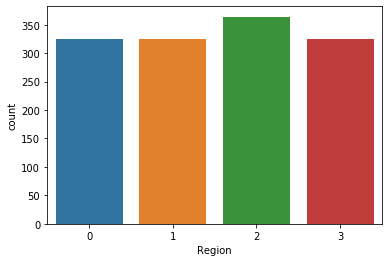

In [17]:
sns.countplot(x='region',data=df)
plt.xlabel('Region')
plt.show()

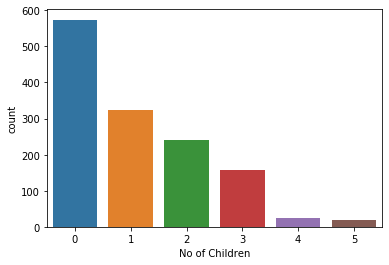

In [18]:
sns.countplot(x='children',data=df)
plt.xlabel('No of Children')
plt.show()

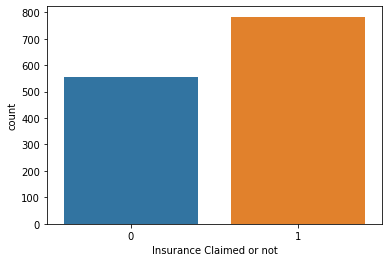

In [19]:
sns.countplot(x='insuranceclaim',data=df)
plt.xlabel('Insurance Claimed or not')
plt.show()

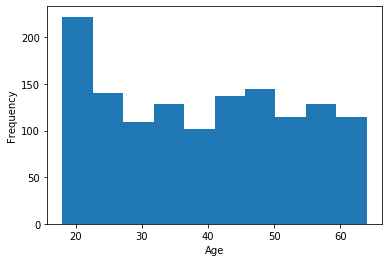

In [20]:
df['age'].plot.hist()
plt.xlabel('Age')
plt.show()

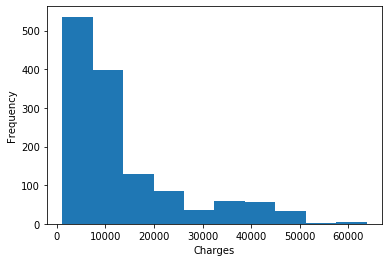

In [21]:
df['charges'].plot.hist()
plt.xlabel('Charges')
plt.show()

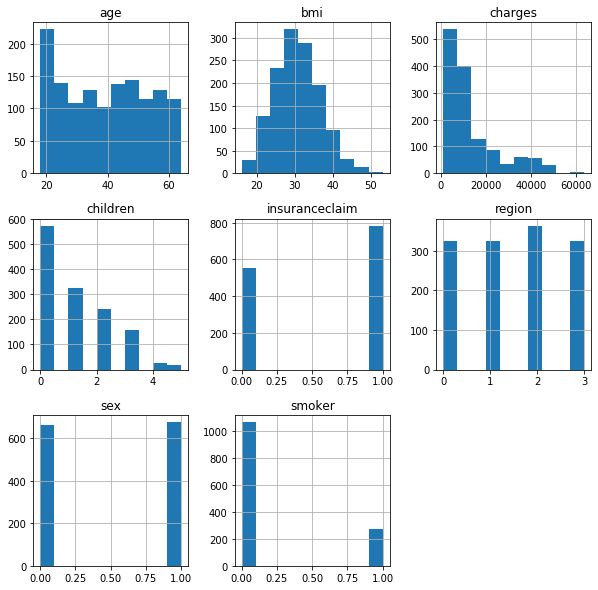

In [22]:
df.hist(figsize=(10,10))
plt.show()

# Bivariate Analysis

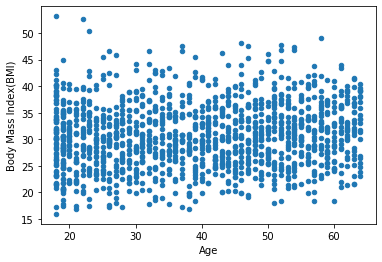

In [23]:
df.plot.scatter('age','bmi')
plt.xlabel('Age')
plt.ylabel('Body Mass Index(BMI)')
plt.show()

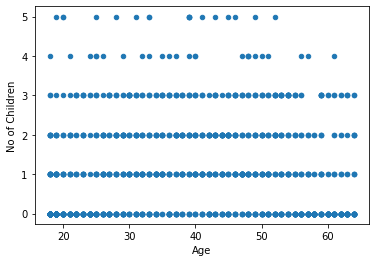

In [24]:
df.plot.scatter('age','children')
plt.xlabel('Age')
plt.ylabel('No of Children')
plt.show()

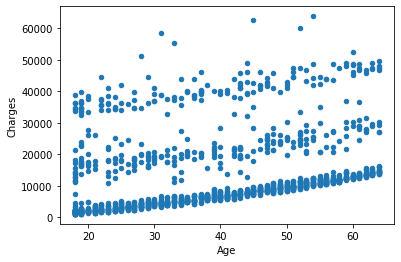

In [25]:
df.plot.scatter('age','charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

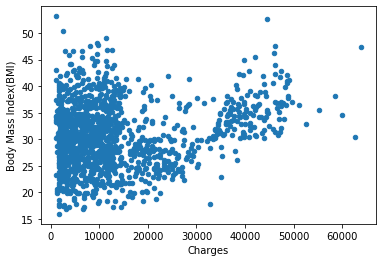

In [26]:
df.plot.scatter('charges','bmi')
plt.xlabel('Charges')
plt.ylabel('Body Mass Index(BMI)')
plt.show()

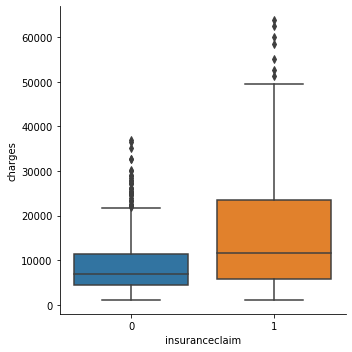

In [27]:
sns.catplot(x='insuranceclaim',y='charges',data=df,kind='box')
plt.show()

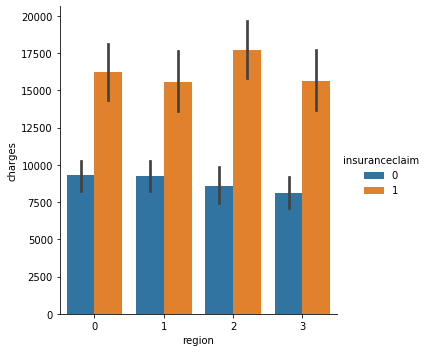

In [28]:
sns.catplot(x='region',y='charges',hue='insuranceclaim',data=df,kind='bar')
plt.show()

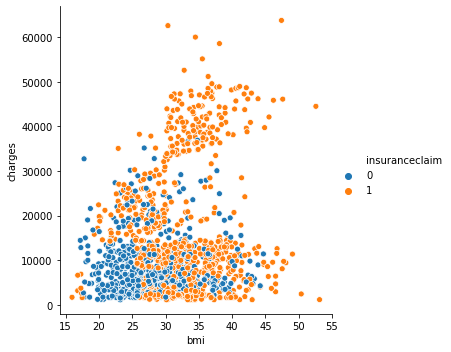

In [29]:
sns.relplot(x='bmi',y='charges',hue='insuranceclaim',data=df)
plt.show()

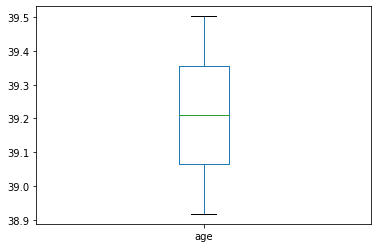

In [30]:
df.groupby('sex')['age'].mean().plot.box()
plt.show()

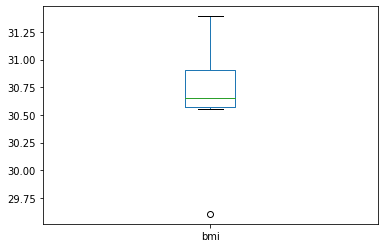

In [31]:
df.groupby('children')['bmi'].mean().plot.box()
plt.show()

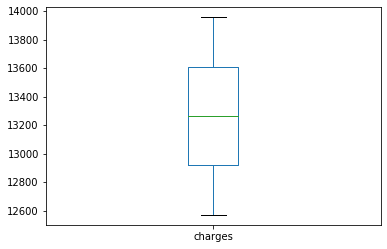

In [32]:
df.groupby('sex')['charges'].mean().plot.box()
plt.show()

In [33]:
pd.crosstab(df['sex'],df['children'])

children,0,1,2,3,4,5
sex,,,,,,
0,289,158,119,77,11,8
1,285,166,121,80,14,10


In [34]:
pd.crosstab(df['sex'],df['insuranceclaim'])

insuranceclaim,0,1
sex,,
0,285,377
1,270,406


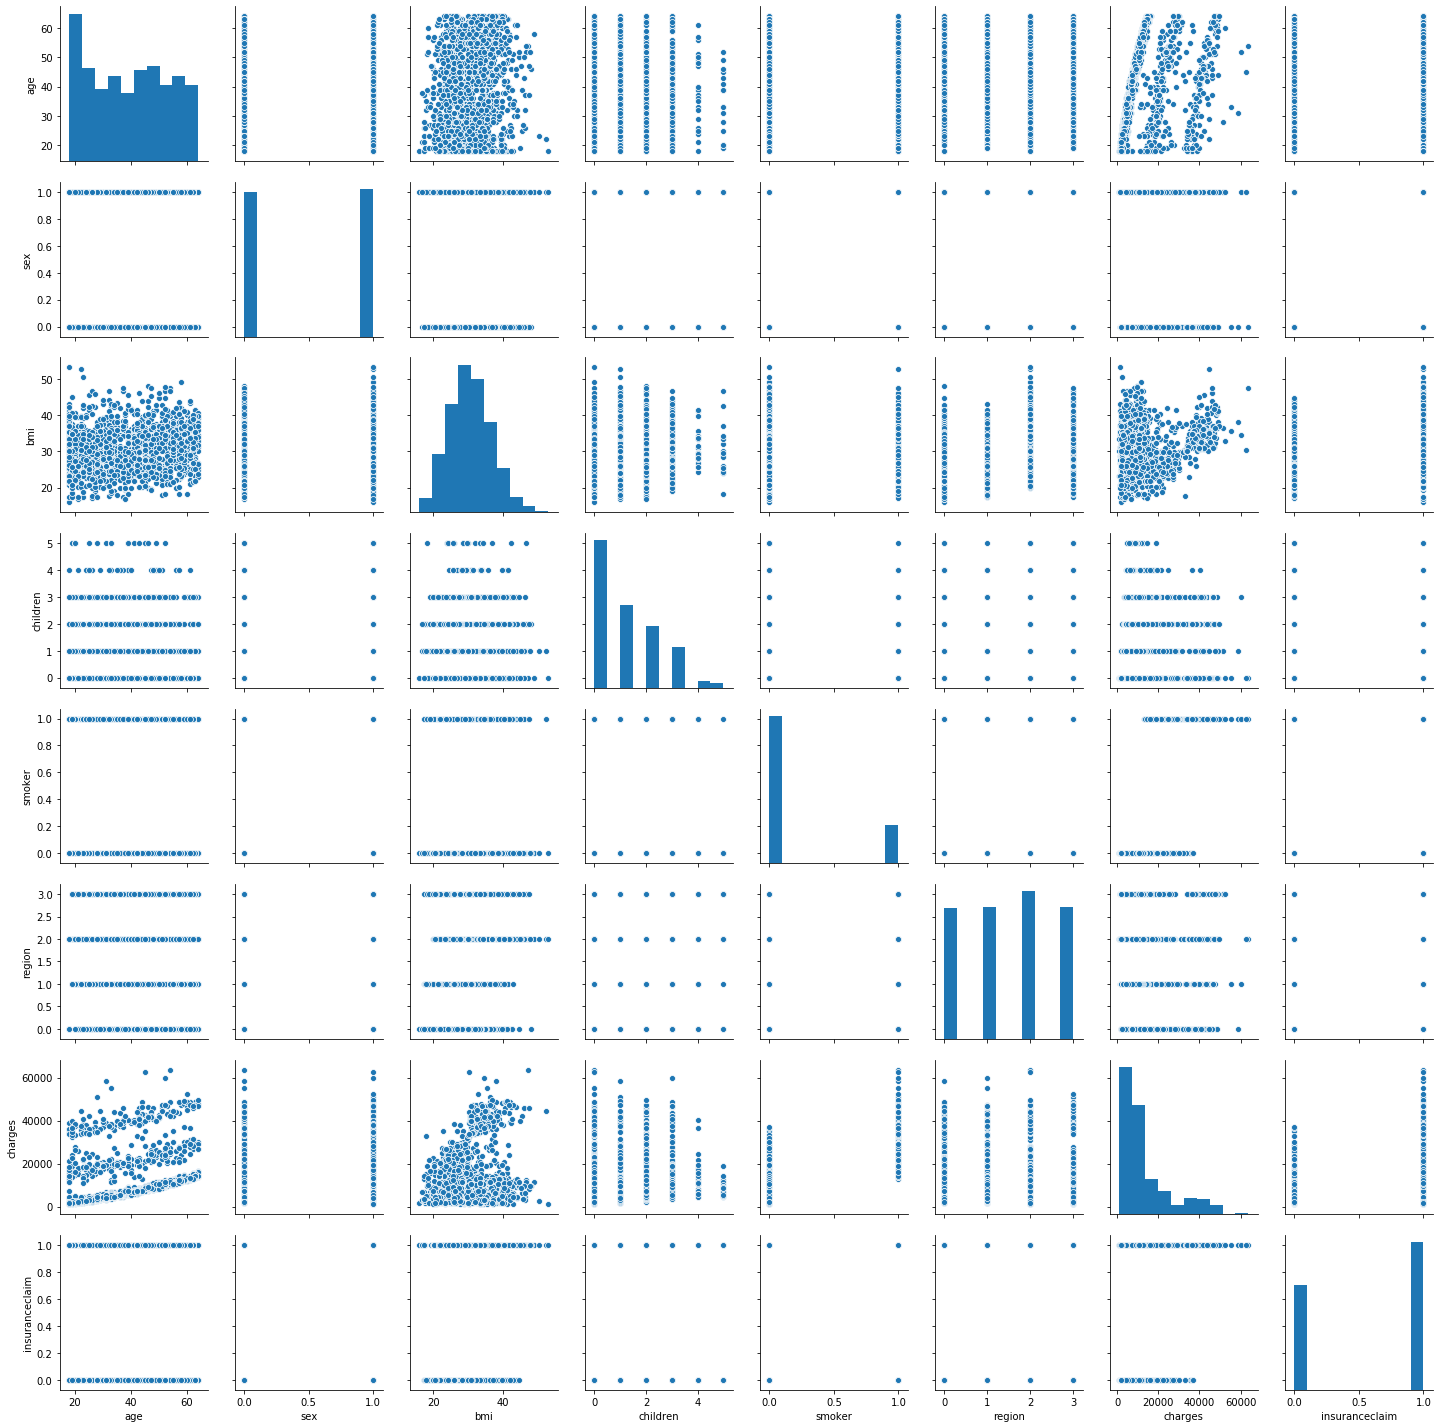

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
collist=df.columns.values

In [37]:
ncol=12
nrows=10

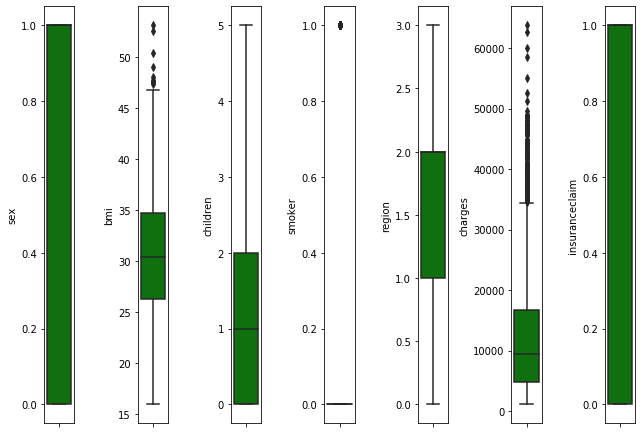

In [38]:
plt.figure(figsize=(15,60))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

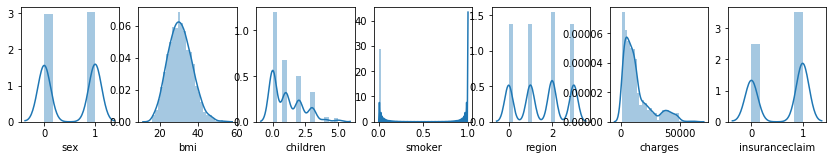

In [39]:
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [40]:
#Checking the skewness of the data

In [41]:
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [42]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [43]:
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [44]:
#Checking the Zscore for outliers and removing (if any)
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape

(1338, 8)

In [45]:
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.shape

(1334, 8)

In [46]:
#Separating the variables like indenpendent and the target variable
x=df_final.drop(columns=["insuranceclaim"])
y=df_final[["insuranceclaim"]]

In [47]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [48]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=52,stratify=y)

In [49]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1000, 7) (334, 7)
(1000, 1) (334, 1)


In [50]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=5)
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [51]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.8832335329341318


Cross_Val_Score =  0.8838503994042093


roc_auc_score =  0.8907028223574985


classification_report
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       139
           1       0.95      0.85      0.89       195

    accuracy                           0.88       334
   macro avg       0.88      0.89      0.88       334
weighted avg       0.89      0.88      0.88       334



[[130   9]
 [ 30 165]]


F1_score= 0.894308943089431


Precision_score= 0.9482758620689655


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function

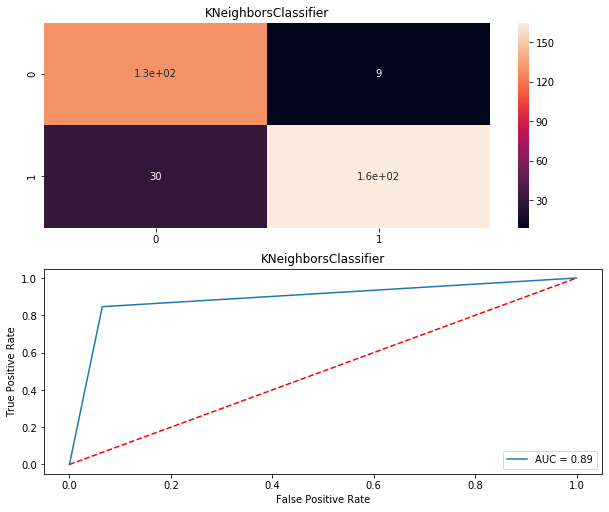

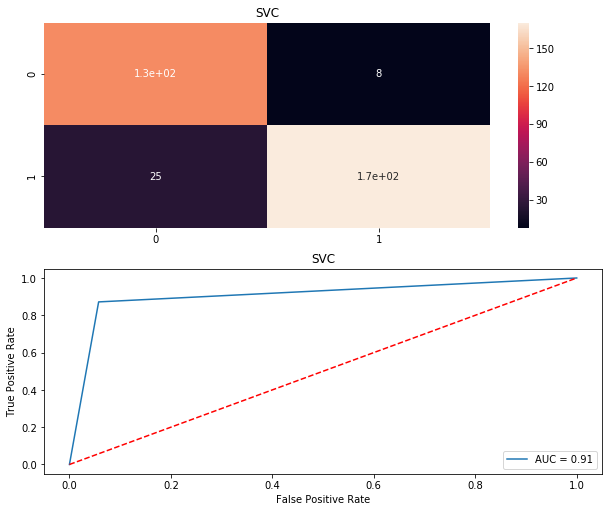

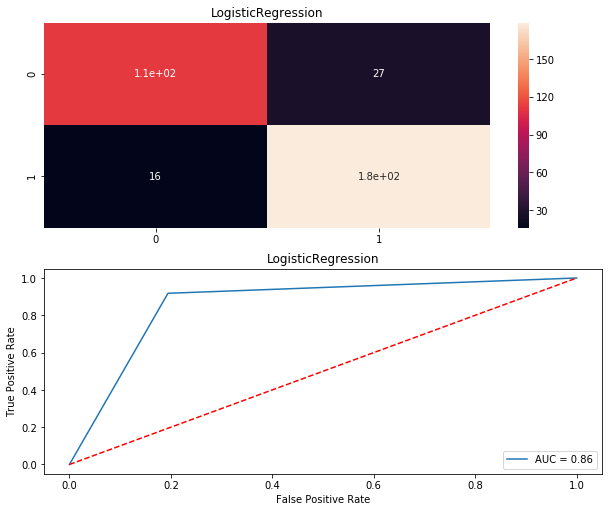

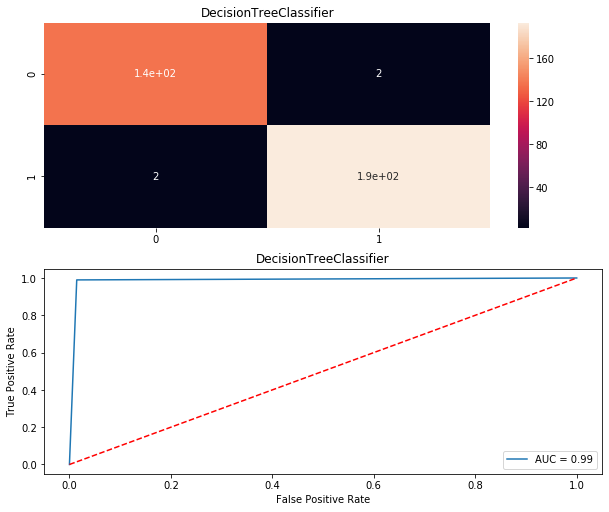

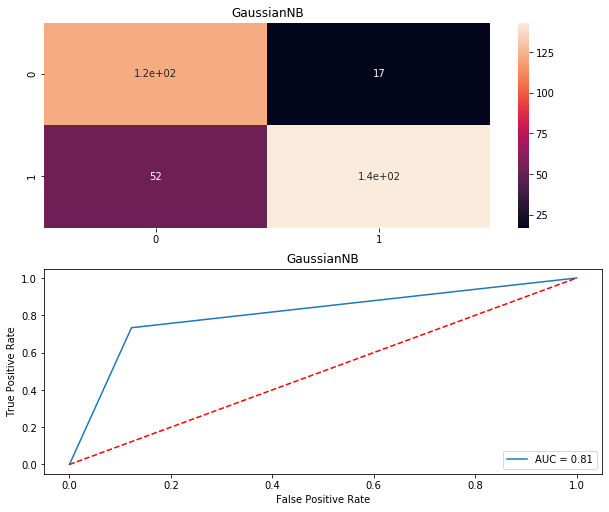

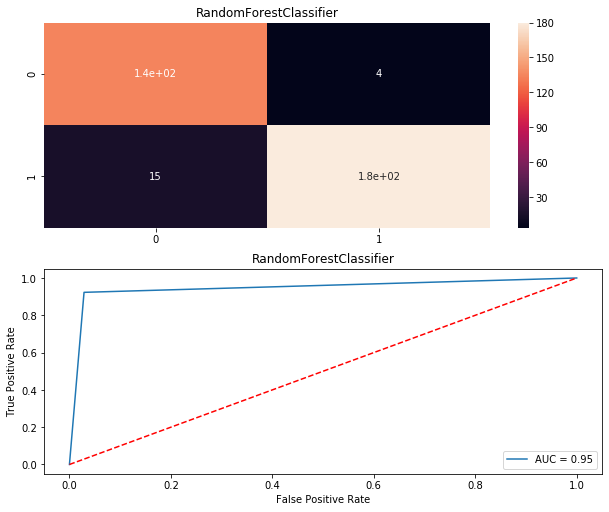

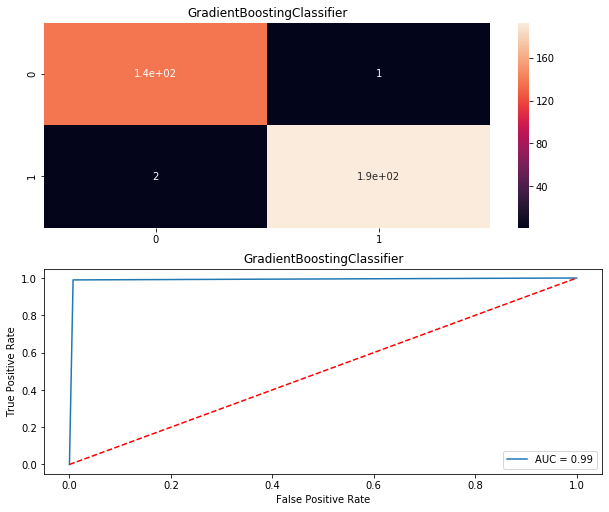

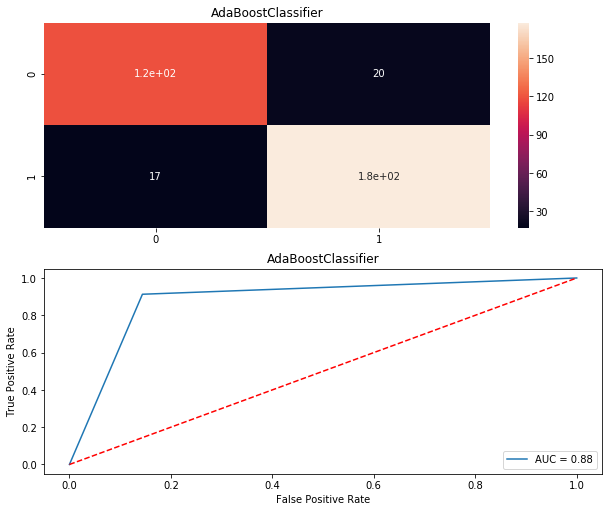

In [52]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [53]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,88.323353,88.385040,89.070282,0.905852,94.827586
1,SVC,90.119760,90.254622,90.712046,0.905852,95.505618
2,LogisticRegression,87.125749,87.102832,86.185206,0.905852,86.893204
3,DecisionTreeClassifier,98.802395,97.829088,98.767755,0.905852,98.974359
4,GaussianNB,79.341317,79.385931,80.551559,0.905852,89.375000
5,RandomForestClassifier,94.311377,94.373145,94.714997,0.905852,97.826087
6,GradientBoostingClassifier,99.101796,97.900305,99.127467,0.905852,99.484536
7,AdaBoostClassifier,88.922156,85.834745,88.446781,0.905852,89.898990


In [54]:
#Lets use GridsearchCV for hyperparamenter tuning for Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV
parameterGBC={
            'n_estimators':[100,200,300],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,3], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBC= GridSearchCV(GBC, param_grid=parameterGBC, n_jobs=-1, cv=10)
gridGBC.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                                                  presort='auto',
  

In [55]:
gridGBC.best_score_ , gridGBC.best_params_

(0.981,
 {'learning_rate': 0.05,
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 200})

In [70]:
GBC=GradientBoostingClassifier(learning_rate= 0.05,
  max_depth= 4,
  max_features= 1.0,
  min_samples_leaf= 3,
  n_estimators= 200)
GBC.fit(x_train,y_train)
score=cross_val_score(GBC,x,y,cv=10,scoring='f1').mean()

In [71]:
print(score)

0.98902944732986


In [58]:
from sklearn.externals import joblib

In [59]:
joblib.dump(GBC,"SBI_Life_Insurance.pkl")

['SBI_Life_Insurance.pkl']